In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy import stats
import statsmodels.api as sm
from sklearn.svm import SVC
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader

In [2]:
df = pd.read_csv("bmi_train.csv")

In [68]:
df_real = pd.read_csv("bmi_train.csv")

In [3]:
df.head()

,Gender,Height,Weight,Index
0,Male,161,89,4
1,Male,179,127,4
2,Male,172,139,5
3,Male,153,104,5
4,Male,165,68,2


In [4]:
len(df)

400

In [5]:
mask = df["Gender"] == "Male"

In [6]:
len(df[mask])

200

In [7]:
gender_counts = df["Gender"].value_counts()

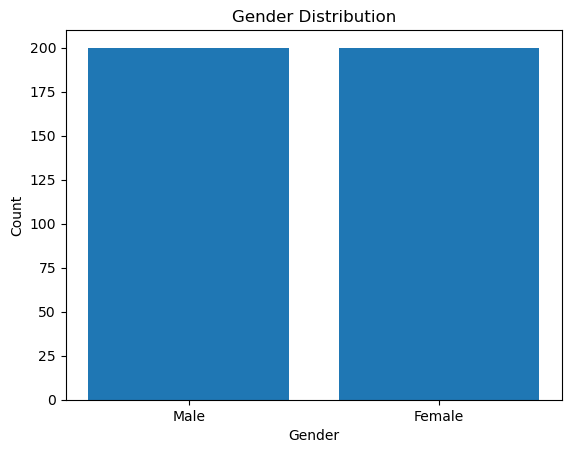

In [8]:
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

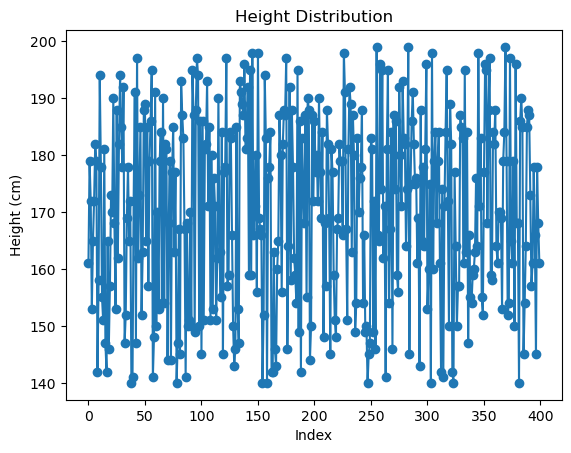

In [9]:
plt.plot(df['Height'], marker='o', linestyle='-')

plt.xlabel('Index')
plt.ylabel('Height (cm)')
plt.title('Height Distribution')
plt.show()

/usr/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


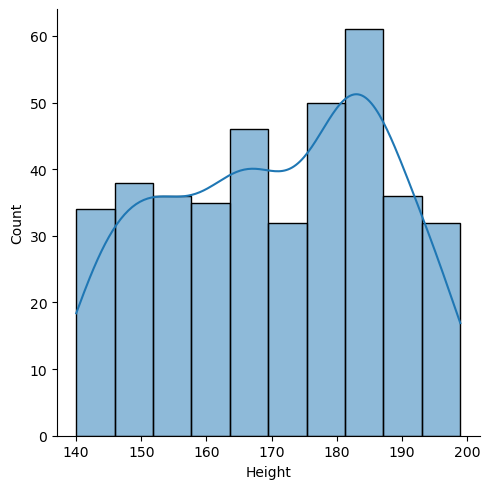

In [10]:
sns.displot(df, x="Height", kde=True)
plt.show()

In [11]:
df_gender_transformed = LabelEncoder().fit_transform(df["Gender"])


In [12]:
df["Gender_transformed"] = df_gender_transformed

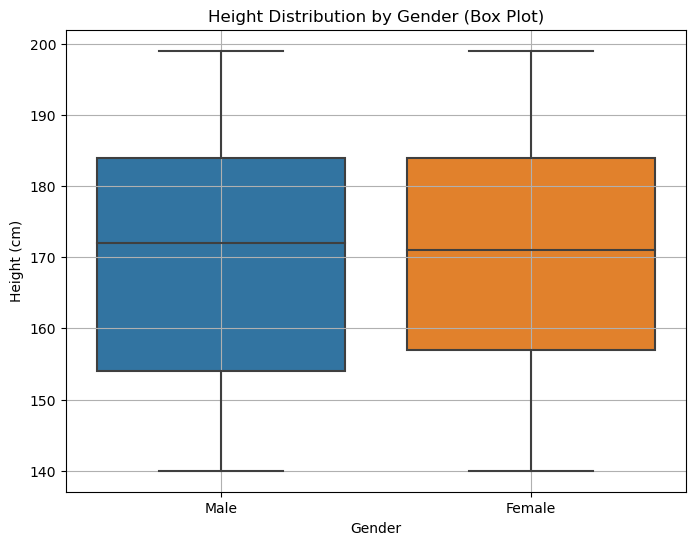

In [13]:
plt.figure(figsize=(8, 6))  # Optional: Adjust the figure size
sns.boxplot(x='Gender', y='Height', data=df)
plt.xlabel('Gender')
plt.ylabel('Height (cm)')
plt.title('Height Distribution by Gender (Box Plot)')
plt.grid(True)
plt.show()

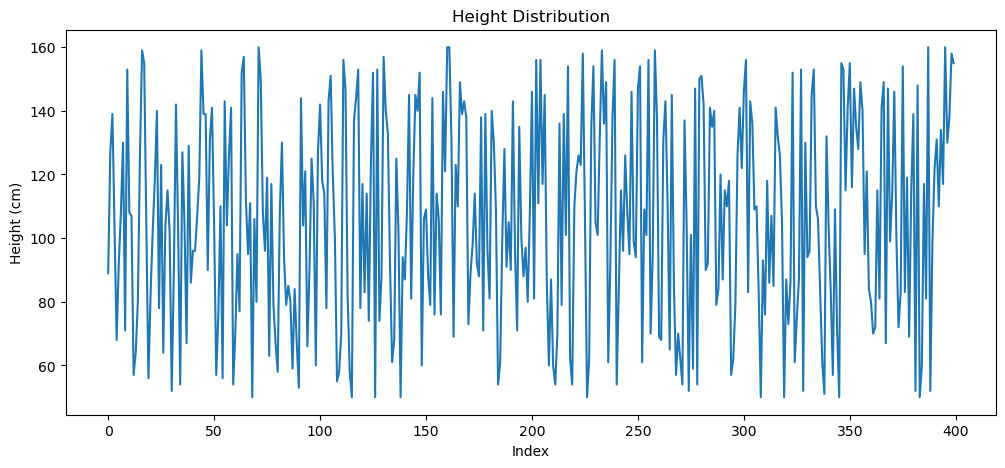

In [14]:
plt.figure(figsize=(12,5))
plt.plot(df['Weight'])


plt.xlabel('Index')
plt.ylabel('Height (cm)')
plt.title('Height Distribution')
plt.show()

/usr/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


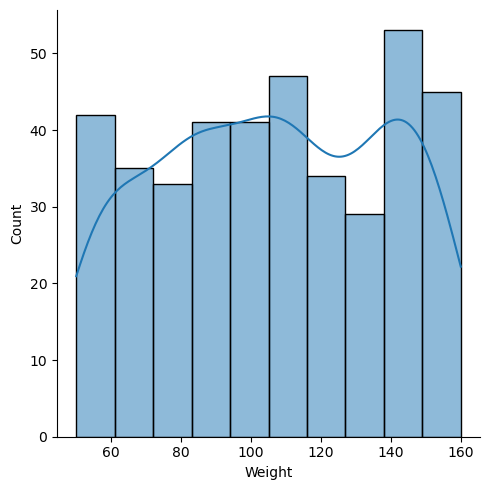

In [15]:
sns.displot(df, x="Weight", kde=True)

In [16]:
df["Weight"]

0       89
1      127
2      139
3      104
4       68
      ... 
395    160
396    130
397    138
398    158
399    155
Name: Weight, Length: 400, dtype: int64

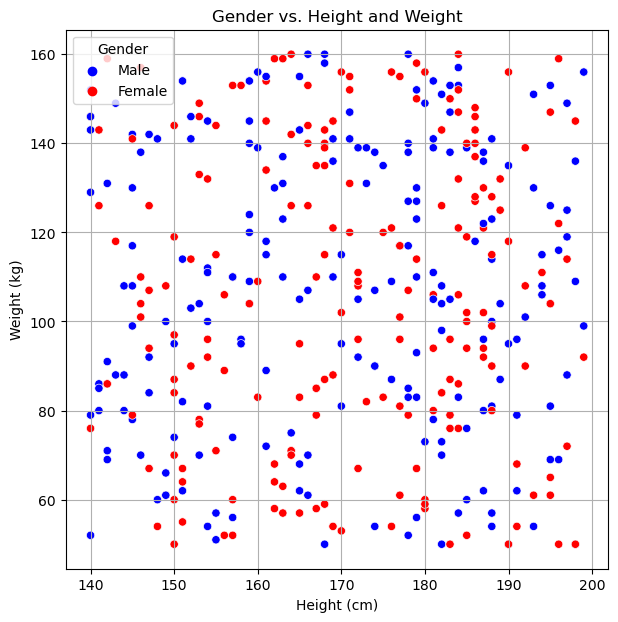

In [17]:
plt.figure(figsize=(7, 7))
sns.scatterplot(x='Height', y='Weight', hue='Gender', data=df, palette={'Male': 'blue', 'Female': 'red'}, marker='o')

plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Gender vs. Height and Weight')

plt.legend(title='Gender')

plt.grid(True)
plt.show()

/tmp/ipykernel_19250/2298098936.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


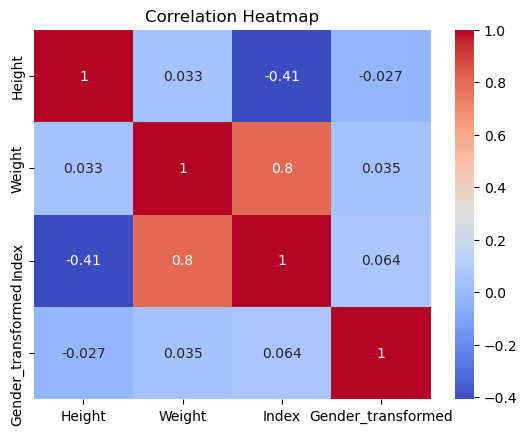

In [18]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

So, the weight and the index are highly correlated, it's no surprise that the bmi index depends heavily on the weight of a person.

In [19]:
df.drop("Gender", inplace=True, axis=1)

In [20]:
df["Height"] = df["Height"] / df["Height"].mean()

In [21]:
df["Weight"] = df["Weight"] / df["Weight"].mean()

In [22]:
target_col = df["Index"].values
df.drop("Index", axis=1, inplace=True)

In [23]:
train_size = int(0.85 * len(df))
train_size

340

In [24]:
df = df.values

In [25]:
x_train, y_train = df[:train_size], target_col[:train_size]

In [26]:
x_test, y_test = df[train_size:], target_col[train_size:]

In [27]:
assert len(x_train) + len(x_test) == len(df)

In [28]:
len(df), len(x_train), len(x_test)

(400, 340, 60)

In [29]:
logistic_regression = LogisticRegression()

In [30]:
logistic_result = logistic_regression.fit(x_train, y_train)

In [31]:
res = logistic_result.predict(x_test)
res

array([5, 4, 2, 5, 2, 2, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 4, 2, 2,
       4, 5, 4, 5, 5, 2, 5, 4, 4, 5, 5, 2, 4, 5, 4, 5, 3, 5, 5, 2, 5, 2,
       2, 5, 4, 5, 2, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [32]:
accuracy = accuracy_score(y_test, res)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.57


In [33]:
conf_matrix = confusion_matrix(y_test, res)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[ 0  0  4  0  0  0]
 [ 0  0  1  1  0  0]
 [ 0  0  3  0  1  0]
 [ 0  0  3  0  5  1]
 [ 0  0  0  0  5 10]
 [ 0  0  0  0  0 26]]


In [34]:
logistic_result.coef_[0]

array([ 0.90592787, -2.06653693,  0.30340629])

In [35]:
coef_magnitudes = abs(logistic_result.coef_[0])
coef_magnitudes

array([0.90592787, 2.06653693, 0.30340629])

In [36]:
logistic_regression = LogisticRegression(penalty="none")

In [37]:
logistic_result = logistic_regression.fit(x_train, y_train)

/usr/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
res = logistic_result.predict(x_test)
accuracy = accuracy_score(y_test, res)
accuracy

0.85

With just a simple removal of the penalty, the model is better.

In [39]:
svm_classifier = SVC(kernel='linear')

In [40]:
svm_classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [41]:
y_pred = svm_classifier.predict(x_test)

In [42]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.63


/usr/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
w = svm_classifier.coef_[0] 

In [44]:
b = svm_classifier.intercept_[0] 

In [45]:
x_points = np.linspace(-1, 1)  

In [46]:
y_points = -(w[0] / w[1]) * x_points - b / w[1]

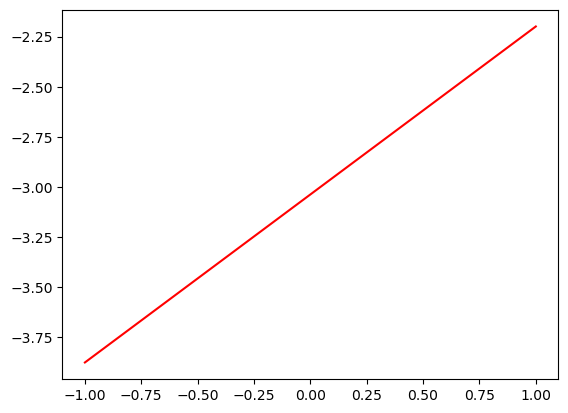

In [47]:
plt.plot(x_points, y_points, c='r');

In [177]:
class Model(nn.Module):
    def __init__(self, n_inputs, n_outputs):
        super().__init__()
        
        self.sequential_layer = nn.Sequential(
            nn.Linear(n_inputs, 512),
            nn.Dropout(0.2),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.Dropout(0.2),
            nn.ReLU(),
            nn.Linear(512, 100),
            nn.Dropout(0.2),
            nn.ReLU(),
            nn.Linear(100, n_outputs),
            #nn.Softmax(dim=-1)
        ).double()
        
    def forward(self, x):
        
        return self.sequential_layer(x)

In [178]:
df_real["Index"].nunique()

6

In [179]:
model = Model(3, df_real["Index"].nunique())

In [195]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)

In [196]:
x_train_tensor, y_train_tensor = torch.tensor(x_train), torch.tensor(y_train).unsqueeze(1)

In [197]:
class BMI_dataset(Dataset):
    def __init__(self):
        super().__init__()
        
        self.x_train = []
        self.y_train = []
        
        for x_train_value, y_train_value in zip(x_train, y_train):
            self.x_train.append(torch.tensor(x_train_value))
            self.y_train.append(torch.tensor(y_train_value))
    
    def __len__(self):
        return len(self.x_train)
    
    def __getitem__(self, index):
        x_train = self.x_train[index]
        y_train = self.y_train[index]
        return x_train, y_train

In [198]:
custom_dataset = BMI_dataset()

In [199]:
data_loader = DataLoader(custom_dataset, batch_size=4, shuffle=True)

In [200]:
n_epochs = 100

In [201]:
def train():
    for epoch in range(1, n_epochs):
        optimizer.zero_grad()
        model.train()
        for x_train_value, y_train_value in data_loader:
            outputs = model(x_train_value)
            loss = criterion(outputs, y_train_value)
            loss.backward()
            optimizer.step()
        if epoch % 20 == 0:
            print(loss.item())

In [202]:
train()

0.09247032614036868
0.3178375637700339
0.2774437437785679
0.5529219840883186


In [203]:
neural_predict = model(torch.tensor(x_test))

In [204]:
neural_predict.shape

torch.Size([60, 6])

In [205]:
y_test.shape

(60,)

In [206]:
predicted_classes = torch.argmax(neural_predict, dim=1)

In [207]:
predicted_classes

tensor([4, 4, 2, 4, 2, 0, 5, 5, 5, 5, 5, 4, 4, 5, 4, 4, 5, 4, 4, 3, 2, 2, 3, 5,
        3, 5, 5, 2, 5, 3, 4, 5, 5, 2, 3, 5, 3, 5, 1, 4, 5, 3, 5, 1, 1, 5, 4, 5,
        1, 3, 4, 5, 5, 5, 4, 5, 5, 5, 5, 5])

In [208]:
y_test

array([5, 4, 0, 4, 3, 0, 5, 5, 5, 5, 5, 4, 4, 5, 4, 4, 5, 4, 4, 3, 2, 3,
       3, 4, 3, 5, 5, 2, 5, 2, 4, 5, 5, 2, 4, 5, 3, 5, 1, 3, 5, 3, 4, 0,
       1, 5, 4, 5, 0, 3, 4, 5, 5, 5, 4, 5, 5, 5, 5, 5])

In [209]:
accuracy = accuracy_score(y_test, predicted_classes.numpy())
accuracy

0.8166666666666667